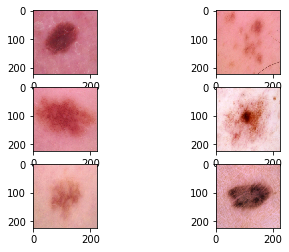

In [36]:
import sys
import os
import h5py
import tensorflow as tf
from matplotlib import pyplot
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# plot skin photos from the benign vs malignant dataset 

# define location of dataset
folder = 'data/train/benign/'

# plot a few images
for i in range(19, 25):
    # define subplot
    pyplot.subplot(320 + (i - 18) )
    # define filename
    filename = folder + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()


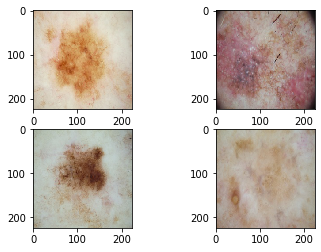

In [11]:
# define location of dataset
folder = 'data/train/malignant/'

# plot a few images
for i in range(28, 32):
    # define subplot
    pyplot.subplot(220 + (i - 27) )
    # define filename
    filename = folder + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()


In [48]:

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('data/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('data/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # save model
    model.save('final_model2.h5')
    print("Saved model to disk")
    


In [13]:
#run_test_harness()

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
> 81.212


In [37]:
#Issues with saving the model :0 (it never prints that it was saved)
run_test_harness()

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
> 76.364
